In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()


load the data

In [2]:
raw_data = pd.read_csv("./machine learning datasets/1.04. Real-life example.csv")
raw_data.head() 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


processing

In [3]:
# exploring the raw data 
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


model has like 312 unique vqlues(dummies) and yes on registration has 3947 which is almost all the values therefore we drops those columns as there wouldnt be relevant to our model

In [4]:
#determining variables of interest.
data = raw_data.drop(["Model"], axis=1) #axis =1 is columns and 0 is rows
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


check for missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

deleting missing values
applying rule of thumb
rule of thumb:if you are removing <5% of the observation,
you are free to remove all the missing values

in this case, there are less than that so we are safe

In [6]:
#we are going to drop all the missing values from the rows
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


exploring probability distribution functions(pdfs) for each variables

C:\Users\Samson\AppData\Local\Temp\ipykernel_4832\2991907454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv["Price"])


<AxesSubplot: xlabel='Price', ylabel='Density'>

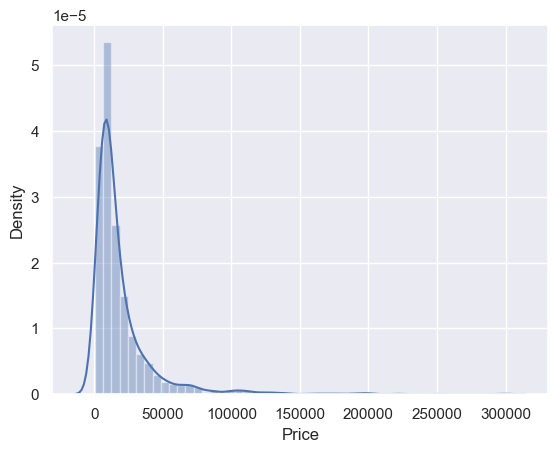

In [8]:
sns.distplot(data_no_mv["Price"])

there are outliers from the distribution considering the mean and the max values of price from the table.
using qyantile to remove outliers

In [9]:
q = data_no_mv["Price"].quantile(0.99)
data_1 = data_no_mv[data_no_mv["Price"]<q]
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


although the max value is not exact but close to the mean of the 
price

C:\Users\Samson\AppData\Local\Temp\ipykernel_4832\2181092534.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["Price"])


<AxesSubplot: xlabel='Price', ylabel='Density'>

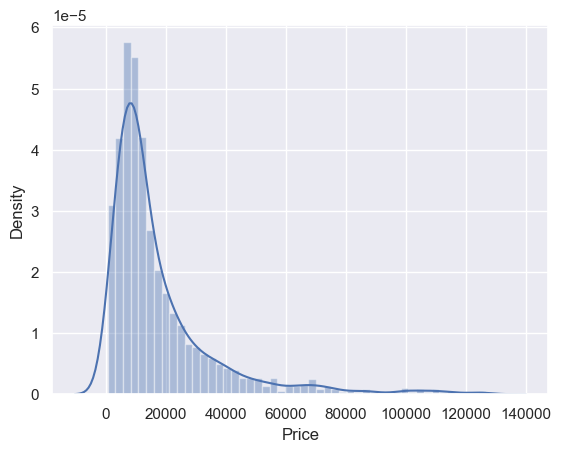

In [10]:
# data distributed same ways but lesser outliers
sns.distplot(data_1["Price"])

repeat same with

C:\Users\Samson\AppData\Local\Temp\ipykernel_4832\4154837745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv["Mileage"])


<AxesSubplot: xlabel='Mileage', ylabel='Density'>

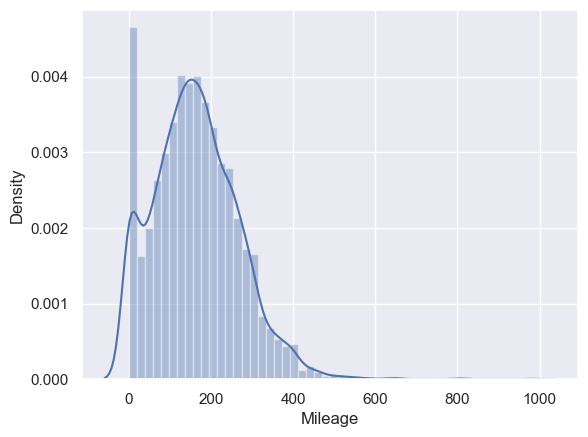

In [11]:
sns.distplot(data_no_mv["Mileage"])

repeat the procedure to remove outliers by keeping only those lower
that 0.99 percentile

In [12]:
q = data_no_mv["Mileage"].quantile(0.99)
data_2 = data_1[data_1["Mileage"]<q]


C:\Users\Samson\AppData\Local\Temp\ipykernel_4832\4073671125.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Mileage"])


<AxesSubplot: xlabel='Mileage', ylabel='Density'>

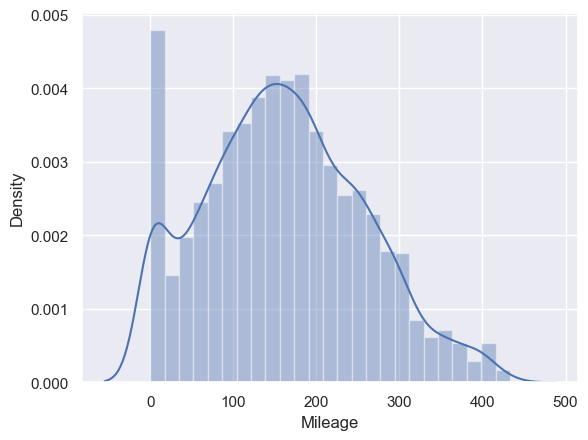

In [13]:
#here is the improve result
sns.distplot(data_2["Mileage"])

C:\Users\Samson\AppData\Local\Temp\ipykernel_4832\3725476673.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data["EngineV"])


<AxesSubplot: xlabel='EngineV', ylabel='Density'>

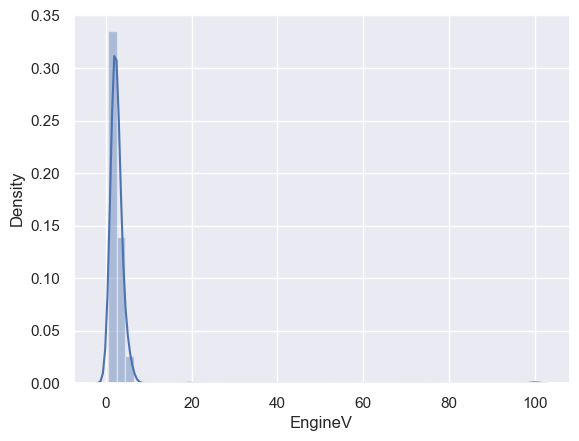

In [14]:
# check for EngineV
sns.distplot(raw_data["EngineV"])

google search reveals that the interval engine volume sholud 
fall is 0.6 and 6.5 therefore, the rest are incorrect values

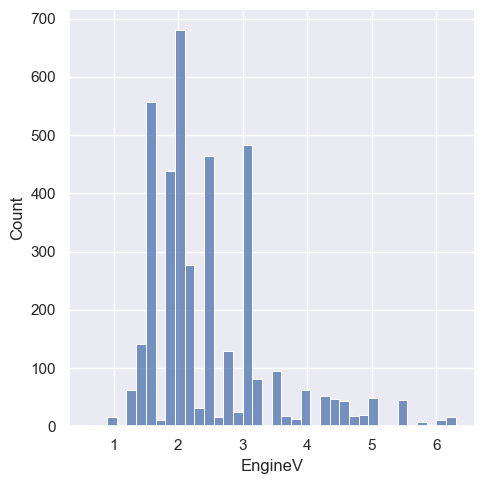

In [15]:
data_3 = data_2[data_2["EngineV"]< 6.5]
sns.displot(data_3["EngineV"])


checking for year

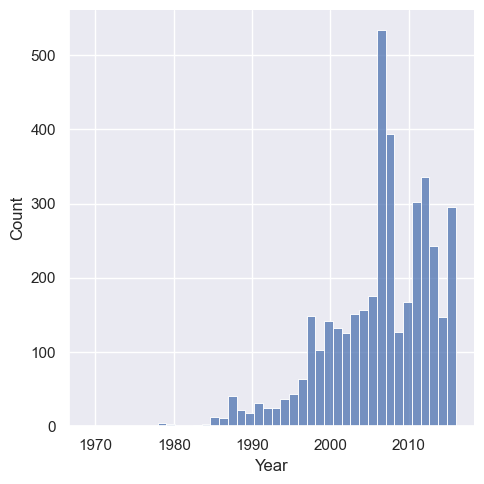

In [16]:
sns.displot(data_no_mv["Year"])

take the 1st percentile and keep all observation that are higher

In [17]:
q = data_3["Year"].quantile(0.01)
data_4 = data_3[data_3["Year"]>q]


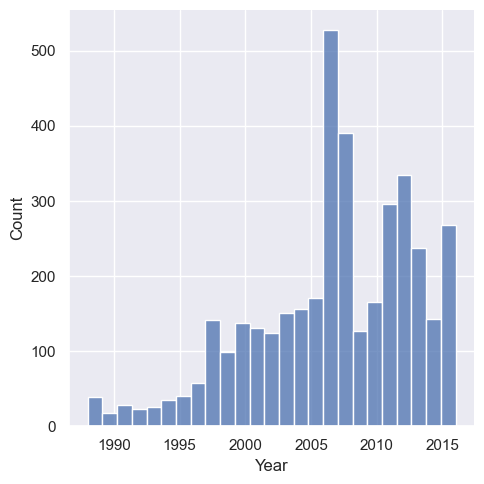

In [18]:
sns.displot(data_4["Year"])

now out data is cleaned
so need to reset the index

In [19]:
cleaned_data = data_4.reset_index(drop=True)

In [20]:
 cleaned_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


checking the ols assuomption

<function matplotlib.pyplot.show(close=None, block=None)>

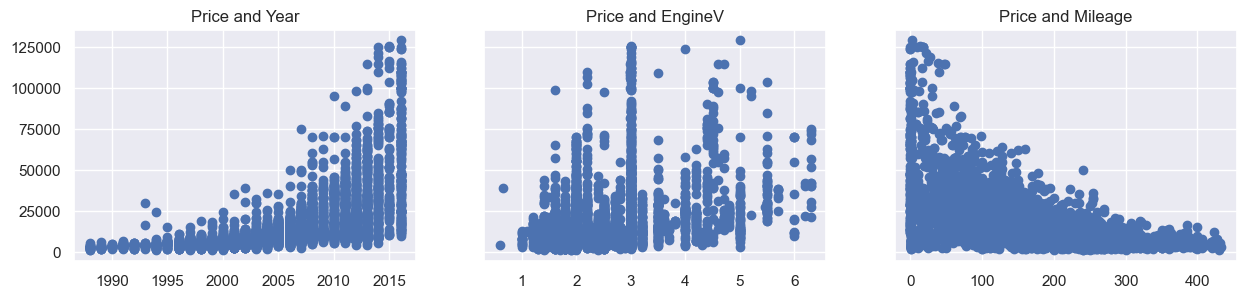

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(cleaned_data["Year"], cleaned_data["Price"])
ax1.set_title("Price and Year")
ax2.scatter(cleaned_data["EngineV"], cleaned_data["Price"])
ax2.set_title("Price and EngineV")
ax3.scatter(cleaned_data["Mileage"], cleaned_data["Price"])
ax3.set_title("Price and Mileage")
plt.show

we can spot patters but cannot run linear regression on this so need to transform
it is not linear so log transformation is the best way deal with this issue

In [22]:
# relaxing the assumption. add log price to the cleaned data and plate again
log_price = np.log(cleaned_data["Price"])
cleaned_data["log_price"] = log_price
cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


add the log_price and replot again

<function matplotlib.pyplot.show(close=None, block=None)>

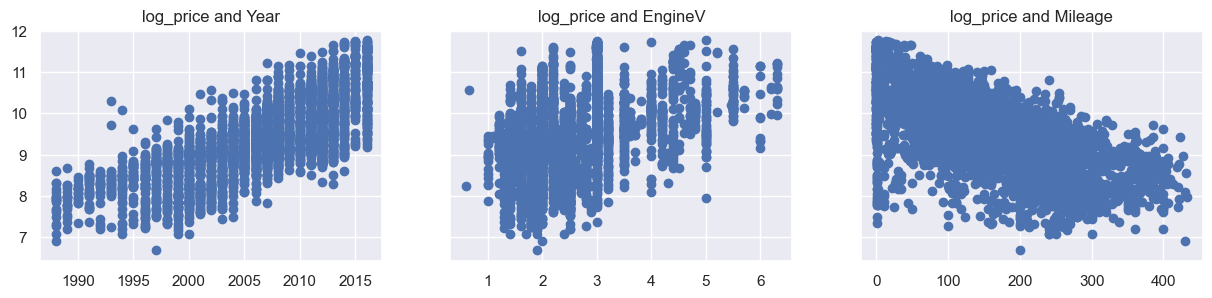

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(cleaned_data["Year"], cleaned_data["log_price"])
ax1.set_title("log_price and Year")
ax2.scatter(cleaned_data["EngineV"], cleaned_data["log_price"])
ax2.set_title("log_price and EngineV")
ax3.scatter(cleaned_data["Mileage"], cleaned_data["log_price"])
ax3.set_title("log_price and Mileage")
plt.show

now the data is spot linearly and then we can drop the original price since is no longer needed

In [24]:
cleaned_data = cleaned_data.drop(["Price"], axis=1)

multicollinearity
year of car is largely depended on its mileage hence,there is multicollinearity

In [25]:
cleaned_data.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[["Mileage", "Year", "EngineV"]]
vif = pd.DataFrame()
vif[vif] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [27]:
vif

,features
0,Mileage
1,Year
2,EngineV


vif = 1: no multicollinearity
1<vif<5: perfect multicollinearity
vif>5 is unaceptable
so we are going to drop year

In [28]:
data_no_multicollinearity = cleaned_data.drop(["Year"], axis=1)
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3861,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3862,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3863,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3864,BMW,sedan,1,3.5,Petrol,yes,8.779557


preprocessing our data
create dummy variable

In [29]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


assigment
1.check the vif of the features including the dummies
2. find the vif of the set of features including where u have not dropped one of the features

rearaange a bit

In [30]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [31]:
cols = ['log_price', 'Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [32]:
data_processed = data_with_dummies[cols]
data_processed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


create linear regression

In [33]:
# declear inputs and target
targets = data_processed["log_price"]
inputs = data_processed.drop(["log_price"], axis=1)

In [34]:
targets.shape, inputs.shape

((3866,), (3866, 17))

In [35]:
#target_matrix = np.reshape(targets,(2,3866))
#target_matrix.shape


scale our data

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [37]:
input_scaled = scaler.transform(inputs)

split data

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

create regression

In [39]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [40]:

yhat = reg.predict(x_train )

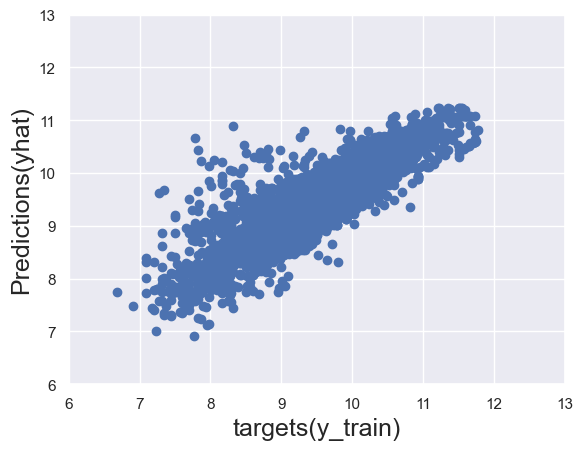

In [41]:
plt.scatter(y_train, yhat)
plt.xlabel("targets(y_train)", size=18)
plt.ylabel("Predictions(yhat)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

autimately if the target is 7, the prediction should be 7 and so on

another plot is a residual plot
Residual is the difference between the targets and th predictions

Text(0.5, 1.0, 'Resiual PDF')

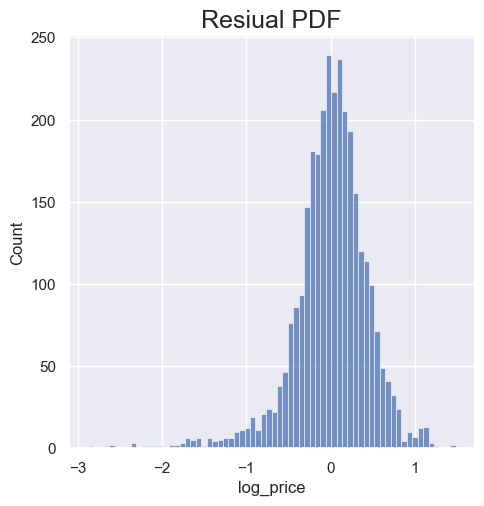

In [42]:
sns.displot(y_train-yhat)
plt.title("Resiual PDF", size=18)

mean = 0 but ther are several negative observation.
there are several observations for which ytrain and yhat is lower than the mean(a much higher price is predicted  than is observed). 
this means that the prediction under estimate the target
Residuals are estimate of the error

In [43]:
# calculate the Rsquare
reg.score(x_train, y_train)

0.7415645182486198

R square is relatively goosd result

finding the weights and the bias

In [44]:
reg.intercept_

9.29702056384695

In [45]:
reg.coef_

array([-0.00469358,  0.22219357,  0.03308551,  0.02755838, -0.49863839,
       -0.57905223, -0.16571619, -0.21126259, -0.61171367, -0.34383351,
       -0.40626505, -0.43458018, -0.44617965, -0.35076975, -0.21057851,
       -0.31125614,  1.09653478])

creating regsummmary

In [46]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.004694
1,EngineV,0.222194
2,Brand_BMW,0.033086
3,Brand_Mercedes-Benz,0.027558
4,Brand_Mitsubishi,-0.498638
5,Brand_Renault,-0.579052
6,Brand_Toyota,-0.165716
7,Brand_Volkswagen,-0.211263
8,Body_hatch,-0.611714
9,Body_other,-0.343834


Weight interpretation
1. A positive weight shows that as a features increases in values so do the log price and the price respectively.
Eg the bigger the EngineV, the higher the price 
2. A negative weight shows that as a features increases in values, log price and the price decrease respectively.

In [47]:
# checking for brand
data_no_multicollinearity ["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

looking at the table, audi is the dropped one.
that is when others are 0, audi is one
audi is the benchmark.
               Dummies Variables
1. a positive weight shows that a respective category(brand) is more expensive than the benchmark(audi)
eg bmw is expensive than audi
2. a negative weight shows that a respective category(brand) is less expensive than the benchmark(audi)
eg mitsubishi is less expensive than audi

testing

In [48]:
y_hat_test = reg.predict(x_test)

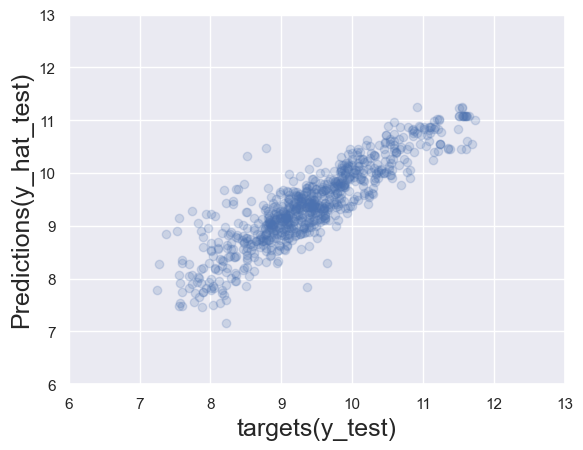

In [49]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("targets(y_test)", size=18)
plt.ylabel("Predictions(y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

from the plot, for higher prices, we have higher concentration values around 45dg line that means, our model is very good at predicting higher prices.
lower prices are more scattered because we cant get the prices
right.
All alpha and set it to 0.2
the more saturated the colour, the higher concentration

lets check for data frame performance

In [69]:
df_pd = pd.DataFrame(y_hat_test, columns=["Predictions"])
df_pd.head()

,Predictions
0,9.273356
1,8.992378
2,8.824541
3,8.936821
4,9.333425


take exp log of the log price to return to the original price

In [70]:
df_pd = pd.DataFrame(np.exp (y_hat_test), columns=["Predictions"])
df_pd.head()

,Predictions
0,10650.438709
1,8041.555683
2,6799.069945
3,7606.977689
4,11309.799759


In [74]:
df_pd["targets"] = np.exp(y_test)
df_pd

,Predictions,targets
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0
...,...,...
769,14874.949923,29500.0
770,5735.556226,5300.0
771,13623.775492,18300.0
772,28096.133846,68500.0


reset the index of ytest

In [67]:
y_test = y_test.reset_index(drop=True)
y_test

0       7.740664
1       9.487972
2       8.999619
3       8.764053
4       9.121509
         ...    
769    10.292146
770     8.575462
771     9.814656
772    11.134589
773     9.287301
Name: log_price, Length: 774, dtype: float64

In [75]:
# rewrite the exp of y_test to get the correct value instead of nan
df_pd["targets"] = np.exp(y_test)
df_pd


,Predictions,targets
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0
...,...,...
769,14874.949923,29500.0
770,5735.556226,5300.0
771,13623.775492,18300.0
772,28096.133846,68500.0


comparing reselt or difference between predictins and target

In [76]:
df_pd["Residuals"] = df_pd["targets"] - df_pd["Predictions"]
df_pd

,Predictions,targets,Residuals
0,10650.438709,2300.0,-8350.438709
1,8041.555683,13200.0,5158.444317
2,6799.069945,8100.0,1300.930055
3,7606.977689,6400.0,-1206.977689
4,11309.799759,9150.0,-2159.799759
...,...,...,...
769,14874.949923,29500.0,14625.050077
770,5735.556226,5300.0,-435.556226
771,13623.775492,18300.0,4676.224508
772,28096.133846,68500.0,40403.866154


In [78]:
df_pd["Differnce%"] = np.absolute(df_pd["Residuals"] / df_pd["targets"] *100)

In [79]:
df_pd

,Predictions,targets,Residuals,Differnce%
0,10650.438709,2300.0,-8350.438709,363.062553
1,8041.555683,13200.0,5158.444317,39.079124
2,6799.069945,8100.0,1300.930055,16.060865
3,7606.977689,6400.0,-1206.977689,18.859026
4,11309.799759,9150.0,-2159.799759,23.604369
...,...,...,...,...
769,14874.949923,29500.0,14625.050077,49.576441
770,5735.556226,5300.0,-435.556226,8.218042
771,13623.775492,18300.0,4676.224508,25.553139
772,28096.133846,68500.0,40403.866154,58.983746


In [80]:
df_pd.describe()

,Predictions,targets,Residuals,Differnce%
count,774.000000,774.000000,774.000000,774.000000
mean,16170.746881,18612.010504,2441.263622,33.814041
std,13742.956902,20953.006281,10835.145339,48.272151
min,1284.843010,1400.000000,-29171.365746,0.056793
25%,7489.039002,6999.250000,-2013.351405,11.277214
50%,11561.730997,11500.000000,150.474574,23.239276
75%,19726.158072,20500.000000,3293.698161,39.023878
max,77447.771561,124000.000000,80642.598057,507.418465


In [83]:
#sort pd by difference
# set pandas to display all rows
pd.options.display.max_rows = 999
pd.set_option("display.float_format", lambda x: "%.2f" %x)
df_pd.sort_values(by=["Differnce%"])

,Predictions,targets,Residuals,Differnce%
264,11493.47,11500.00,6.53,0.06
742,16985.25,16999.00,13.75,0.08
60,12486.36,12500.00,13.64,0.11
127,23257.55,23200.00,-57.55,0.25
308,8876.92,8900.00,23.08,0.26
242,7478.35,7500.00,21.65,0.29
698,30600.22,30500.00,-100.22,0.33
379,17733.15,17800.00,66.85,0.38
114,27429.73,27300.00,-129.73,0.48
317,11560.12,11500.00,-60.12,0.52


our model is not really perfect because of the negative residual factores leading to larger difference, this could be due to many factors.